In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
location = 'kc_house_data.csv'
df=pd.read_csv(location)

df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [4]:
stats_df = df.drop(['id', 'date', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'], axis=1)

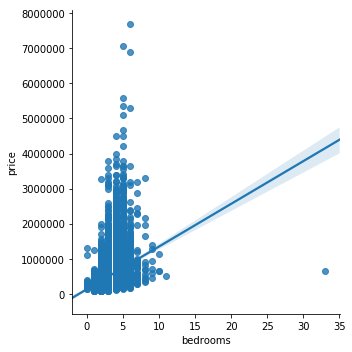

In [5]:
sns.lmplot(x='bedrooms', y='price', data=stats_df)

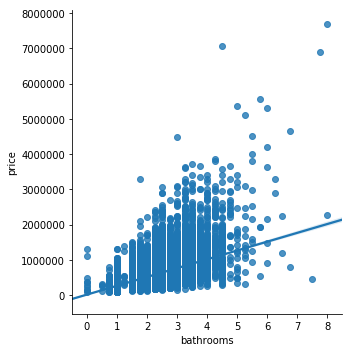

In [6]:
sns.lmplot(x='bathrooms', y='price', data=stats_df)
#price increase as the number of bathrooms increase 

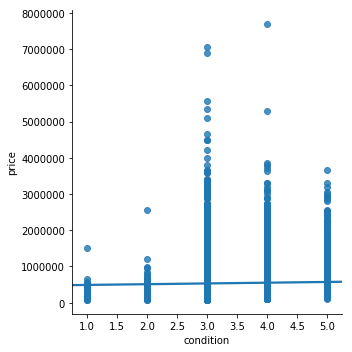

In [7]:
sns.lmplot(x='condition', y='price', data=stats_df)

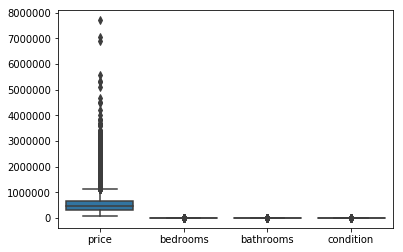

In [8]:
sns.boxplot(data=stats_df)

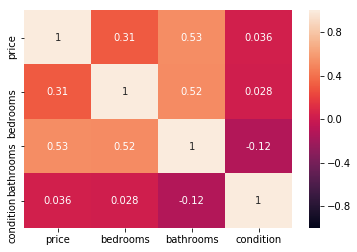

In [9]:
corr = stats_df.corr()

sns.heatmap(corr, vmin=-1, annot=True)

(array([ -5.,   0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.]),
 <a list of 10 Text xticklabel objects>)

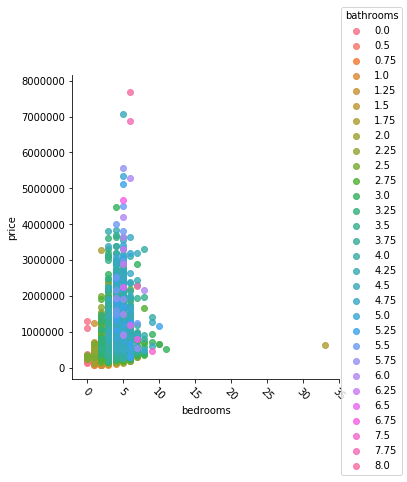

In [23]:
sns.lmplot(x='bedrooms' , y='price' , data=stats_df,
           fit_reg=False,
           hue= 'bathrooms')
plt.xticks (rotation=-45)

In [11]:
import numpy as np

In [12]:
stats_df.corr

<bound method DataFrame.corr of            price  bedrooms  bathrooms  condition
0       221900.0         3       1.00          3
1       538000.0         3       2.25          3
2       180000.0         2       1.00          3
3       604000.0         4       3.00          5
4       510000.0         3       2.00          3
5      1225000.0         4       4.50          3
6       257500.0         3       2.25          3
7       291850.0         3       1.50          3
8       229500.0         3       1.00          3
9       323000.0         3       2.50          3
10      662500.0         3       2.50          3
11      468000.0         2       1.00          4
12      310000.0         3       1.00          4
13      400000.0         3       1.75          4
14      530000.0         5       2.00          3
15      650000.0         4       3.00          3
16      395000.0         3       2.00          3
17      485000.0         4       1.00          4
18      189000.0         2       1.00

In [13]:
import statsmodels.formula.api as smf

In [14]:
result = smf.ols ('price ~ bedrooms + bathrooms + condition', data=stats_df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                     2905.
Date:                Sat, 09 Mar 2019   Prob (F-statistic):               0.00
Time:                        12:47:10   Log-Likelihood:            -3.0394e+05
No. Observations:               21613   AIC:                         6.079e+05
Df Residuals:                   21609   BIC:                         6.079e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.253e+05    1.4e+04    -16.094      0.000   -2.53e+05   -1.98e+05
bedrooms    1.514e+04   2662.036      5.687      0.000    9921.357    2.04e+04
bathrooms   2.469e+05   3238.811     76.217      0.000    2.41e+05    2.53e+05
condition   5.641e+04   3285.055     17.172      0.000       5e+04    6.29e+04
==============================================================================
Omnibus:                    17366.993   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           918986.680
Skew:                           3.473   Prob(JB):                         0.00
Kurtosis:                      34.181   Cond. No.                         36.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
result = smf.ols ('price ~ bedrooms + bathrooms + condition - 1', data=stats_df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                 2.440e+04
Date:                Sat, 09 Mar 2019   Prob (F-statistic):               0.00
Time:                        12:47:12   Log-Likelihood:            -3.0407e+05
No. Observations:               21613   AIC:                         6.081e+05
Df Residuals:                   21610   BIC:                         6.082e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
bedrooms    2404.7359   2556.854      0.941      0.347   -2606.886    7416.358
bathrooms    2.32e+05   3123.904     74.281      0.000    2.26e+05    2.38e+05
condition    1.36e+04   1939.058      7.014      0.000    9799.513    1.74e+04
==============================================================================
Omnibus:                    17943.078   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1006935.168
Skew:                           3.641   Prob(JB):                         0.00
Kurtosis:                      35.636   Cond. No.                         9.34
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
result = smf.ols ('price ~ bedrooms + condition', data=stats_df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     1145.
Date:                Sat, 09 Mar 2019   Prob (F-statistic):               0.00
Time:                        12:47:12   Log-Likelihood:            -3.0652e+05
No. Observations:               21613   AIC:                         6.130e+05
Df Residuals:                   21610   BIC:                         6.131e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.775e+04   1.51e+04      5.142      0.000    4.81e+04    1.07e+05
bedrooms    1.214e+05   2554.323     47.530      0.000    1.16e+05    1.26e+05
condition   1.557e+04   3650.717      4.266      0.000    8418.022    2.27e+04
==============================================================================
Omnibus:                    18867.748   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1204731.318
Skew:                           3.905   Prob(JB):                         0.00
Kurtosis:                      38.732   Cond. No.                         32.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

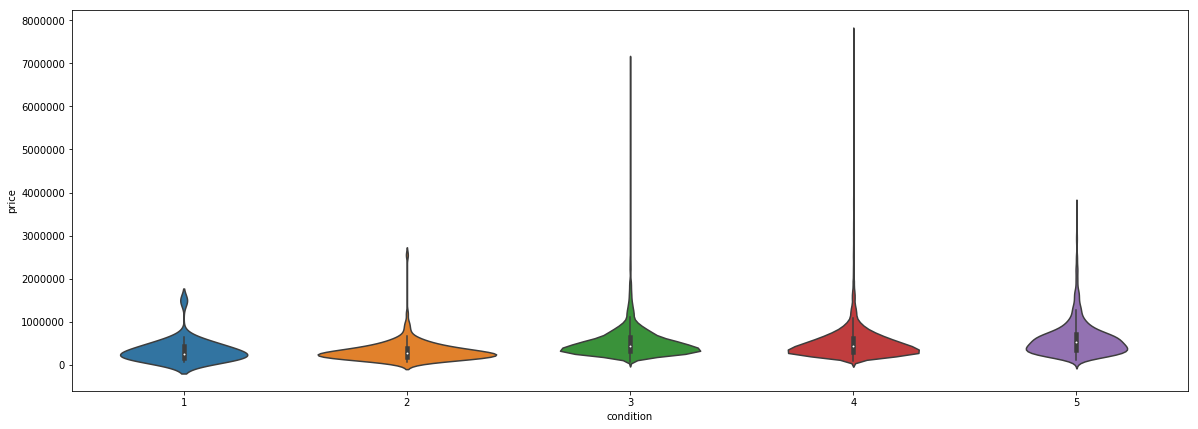

In [21]:
plt.subplots(figsize=(20,7))
sns.violinplot (x='condition', y='price', data=stats_df)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text xticklabel objects>)

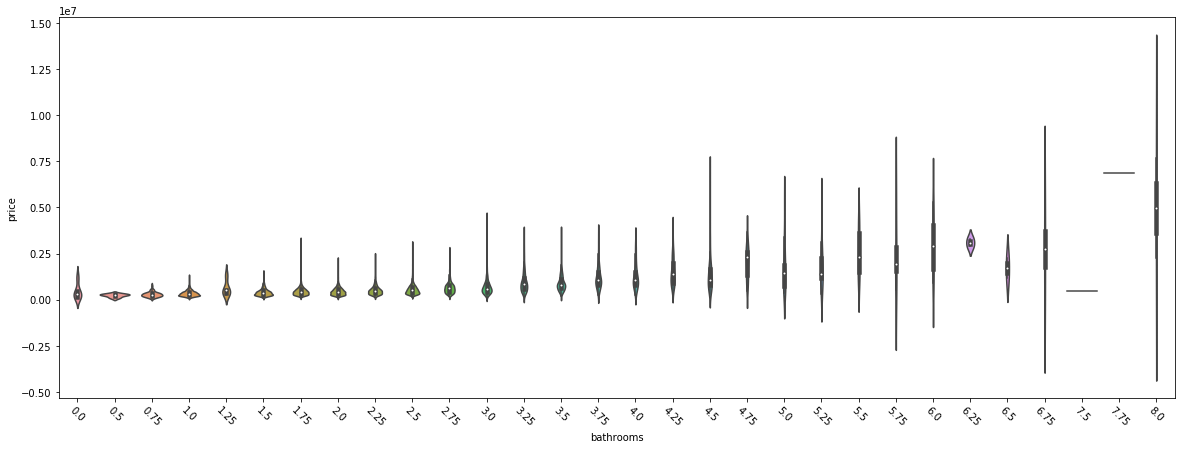

In [18]:
plt.subplots(figsize=(20,7))
sns.violinplot (x='bathrooms', y='price', data=stats_df)
plt.xticks(rotation=-45)

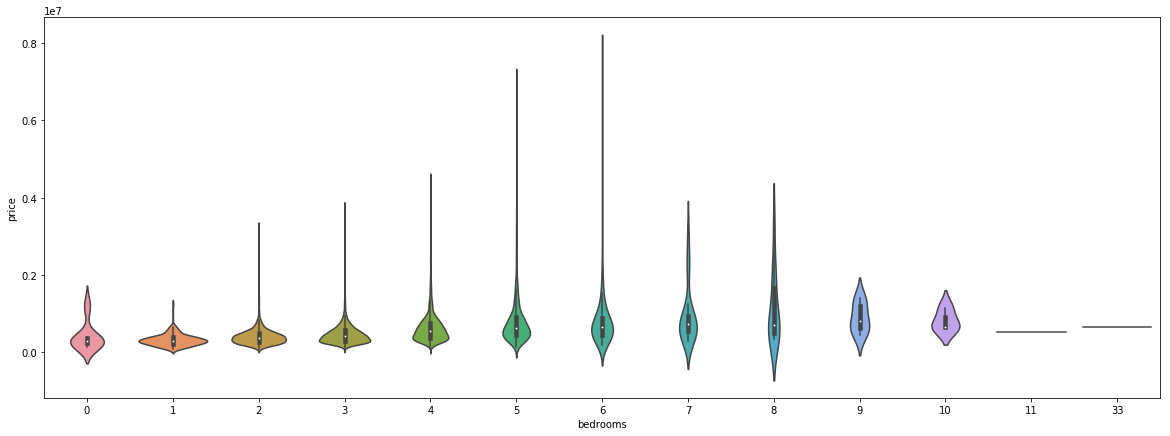

In [20]:
plt.subplots(figsize=(20,7))
sns.violinplot (x='bedrooms', y='price', data=stats_df)